Testing for 2 states

In [16]:
import numpy as np, pandas as pd
from hmmlearn.hmm import GaussianHMM

FILE_PATH = r"C:\Users\roosd\Downloads\econometrie jaar 3\Thesis\sp500_weekly.csv"
SEEDS = range(50)

def load_returns(path):
    df = pd.read_csv(path)
    if "LogReturn" not in df.columns:
        price_col = "Close" if "Close" in df.columns else "Adj Close"
        df[price_col] = pd.to_numeric(df[price_col], errors="coerce")
        df["LogReturn"] = np.log(df[price_col] / df[price_col].shift(1))
    return pd.to_numeric(df["LogReturn"], errors="coerce").dropna().values.reshape(-1,1)

def n_params(n): return n**2 + 2*n - 1

def main():
    X = load_returns(FILE_PATH)
    n = 2
    metrics = []
    for s in SEEDS:
        m = GaussianHMM(n_components=n, covariance_type="diag", n_iter=1000, random_state=s).fit(X)
        ll = m.score(X)
        k = n_params(n)
        aic = 2*k - 2*ll
        bic = k*np.log(len(X)) - 2*ll
        metrics.append({"seed": s, "logL": ll, "AIC": aic, "BIC": bic})

    df = pd.DataFrame(metrics)
    print("\n=== 2-State HMM: AIC & BIC across 50 seeds ===")
    print(df.round(2))
    print("\nMean ± SD:")
    print(f"AIC: {df['AIC'].mean():.2f} ± {df['AIC'].std(ddof=1):.2f}")
    print(f"BIC: {df['BIC'].mean():.2f} ± {df['BIC'].std(ddof=1):.2f}")

    best = df.loc[df["BIC"].idxmin()]
    print(f"\nBest (lowest BIC) → seed={int(best.seed)} | logL={best.logL:.2f} | "
          f"AIC={best.AIC:.2f} | BIC={best.BIC:.2f}")

if __name__ == "__main__":
    main()


Model is not converging.  Current: 2556.3015185866543 is not greater than 2556.3156838134337. Delta is -0.014165226779368822
Model is not converging.  Current: 2556.2843130346632 is not greater than 2556.3153821372107. Delta is -0.031069102547462535
Model is not converging.  Current: 2556.301117915266 is not greater than 2556.315982124093. Delta is -0.014864208827020775
Model is not converging.  Current: 2556.5797927186422 is not greater than 2556.5931840962335. Delta is -0.013391377591233322
Model is not converging.  Current: 2556.274789323153 is not greater than 2556.305315992971. Delta is -0.030526669817845686
Model is not converging.  Current: 2556.1322350356613 is not greater than 2556.1335961218624. Delta is -0.0013610862010864366
Model is not converging.  Current: 2556.2854808059737 is not greater than 2556.310421388755. Delta is -0.024940582781255216
Model is not converging.  Current: 2556.2499490587657 is not greater than 2556.257768571924. Delta is -0.007819513158210611
Model


=== 2-State HMM: AIC & BIC across 50 seeds ===
    seed     logL      AIC      BIC
0      0  2556.26 -5098.51 -5063.87
1      1  2556.24 -5098.47 -5063.82
2      2  2556.26 -5098.51 -5063.86
3      3  2555.96 -5097.93 -5063.28
4      4  2556.51 -5099.02 -5064.37
5      5  2556.23 -5098.45 -5063.80
6      6  2556.11 -5098.23 -5063.58
7      7  2556.24 -5098.48 -5063.83
8      8  2556.17 -5098.33 -5063.68
9      9  2555.96 -5097.92 -5063.28
10    10  2556.07 -5098.14 -5063.49
11    11  2556.06 -5098.12 -5063.47
12    12  2376.72 -4739.43 -4704.78
13    13  2556.16 -5098.33 -5063.68
14    14  2556.21 -5098.43 -5063.78
15    15  2555.97 -5097.93 -5063.28
16    16  2555.97 -5097.93 -5063.28
17    17  2555.96 -5097.93 -5063.28
18    18  2556.30 -5098.59 -5063.94
19    19  2555.98 -5097.96 -5063.32
20    20  2556.19 -5098.39 -5063.74
21    21  2556.11 -5098.22 -5063.57
22    22  2556.18 -5098.37 -5063.72
23    23  2556.08 -5098.15 -5063.50
24    24  2556.25 -5098.50 -5063.85
25    25  2556.1

Testing for 3 states

In [17]:
import numpy as np, pandas as pd
from hmmlearn.hmm import GaussianHMM

FILE_PATH = r"C:\Users\roosd\Downloads\econometrie jaar 3\Thesis\sp500_weekly.csv"
SEEDS = range(50)

def load_returns(path):
    df = pd.read_csv(path)
    if "LogReturn" not in df.columns:
        price_col = "Close" if "Close" in df.columns else "Adj Close"
        df[price_col] = pd.to_numeric(df[price_col], errors="coerce")
        df["LogReturn"] = np.log(df[price_col] / df[price_col].shift(1))
    return pd.to_numeric(df["LogReturn"], errors="coerce").dropna().values.reshape(-1,1)

def n_params(n): return n**2 + 2*n - 1

def main():
    X = load_returns(FILE_PATH)
    n = 3
    metrics = []
    for s in SEEDS:
        m = GaussianHMM(n_components=n, covariance_type="diag", n_iter=1000, random_state=s).fit(X)
        ll = m.score(X)
        k = n_params(n)
        aic = 2*k - 2*ll
        bic = k*np.log(len(X)) - 2*ll
        metrics.append({"seed": s, "logL": ll, "AIC": aic, "BIC": bic})

    df = pd.DataFrame(metrics)
    print("\n=== 3-State HMM: AIC & BIC across 50 seeds ===")
    print(df.round(2))
    print("\nMean ± SD:")
    print(f"AIC: {df['AIC'].mean():.2f} ± {df['AIC'].std(ddof=1):.2f}")
    print(f"BIC: {df['BIC'].mean():.2f} ± {df['BIC'].std(ddof=1):.2f}")

    best = df.loc[df["BIC"].idxmin()]
    print(f"\nBest (lowest BIC) → seed={int(best.seed)} | logL={best.logL:.2f} | "
          f"AIC={best.AIC:.2f} | BIC={best.BIC:.2f}")

if __name__ == "__main__":
    main()


Model is not converging.  Current: 2561.493875292275 is not greater than 2561.551018319542. Delta is -0.0571430272671023
Model is not converging.  Current: 2584.523937700962 is not greater than 2584.541738475979. Delta is -0.017800775016894477
Model is not converging.  Current: 2584.7159418378 is not greater than 2584.7204489087203. Delta is -0.004507070920226397
Model is not converging.  Current: 2557.983492089298 is not greater than 2558.0283894185823. Delta is -0.04489732928414014
Model is not converging.  Current: 2560.9171563871773 is not greater than 2560.9785340907415. Delta is -0.061377703564176045



=== 3-State HMM: AIC & BIC across 50 seeds ===
    seed     logL      AIC      BIC
0      0  2561.38 -5094.77 -5025.47
1      1  2562.07 -5096.13 -5026.83
2      2  2560.97 -5093.93 -5024.64
3      3  2584.71 -5141.42 -5072.12
4      4  2584.63 -5141.26 -5071.96
5      5  2584.59 -5141.19 -5071.89
6      6  2584.49 -5140.99 -5071.69
7      7  2584.68 -5141.36 -5072.06
8      8  2563.93 -5099.86 -5030.56
9      9  2584.61 -5141.21 -5071.91
10    10  2584.62 -5141.24 -5071.94
11    11  2556.61 -5085.23 -5015.93
12    12  2584.70 -5141.40 -5072.10
13    13  2555.96 -5083.93 -5014.63
14    14  2563.92 -5099.85 -5030.55
15    15  2557.89 -5087.78 -5018.48
16    16  2560.15 -5092.30 -5023.00
17    17  2584.24 -5140.48 -5071.18
18    18  2584.58 -5141.15 -5071.86
19    19  2584.62 -5141.24 -5071.94
20    20  2584.24 -5140.49 -5071.19
21    21  2584.56 -5141.12 -5071.82
22    22  2584.62 -5141.23 -5071.94
23    23  2558.12 -5088.23 -5018.93
24    24  2563.94 -5099.89 -5030.59
25    25  2562.7

Testing for 4 states

In [19]:
import numpy as np, pandas as pd
from hmmlearn.hmm import GaussianHMM

FILE_PATH = r"C:\Users\roosd\Downloads\econometrie jaar 3\Thesis\sp500_weekly.csv"
SEEDS = range(50)

def load_returns(path):
    df = pd.read_csv(path)
    if "LogReturn" not in df.columns:
        price_col = "Close" if "Close" in df.columns else "Adj Close"
        df[price_col] = pd.to_numeric(df[price_col], errors="coerce")
        df["LogReturn"] = np.log(df[price_col] / df[price_col].shift(1))
    return pd.to_numeric(df["LogReturn"], errors="coerce").dropna().values.reshape(-1,1)

def n_params(n): return n**2 + 2*n - 1

def main():
    X = load_returns(FILE_PATH)
    n = 4
    metrics = []
    for s in SEEDS:
        m = GaussianHMM(n_components=n, covariance_type="diag", n_iter=1000, random_state=s).fit(X)
        ll = m.score(X)
        k = n_params(n)
        aic = 2*k - 2*ll
        bic = k*np.log(len(X)) - 2*ll
        metrics.append({"seed": s, "logL": ll, "AIC": aic, "BIC": bic})

    df = pd.DataFrame(metrics)
    print("\n=== 4-State HMM: AIC & BIC across 50 seeds ===")
    print(df.round(2))
    print("\nMean ± SD:")
    print(f"AIC: {df['AIC'].mean():.2f} ± {df['AIC'].std(ddof=1):.2f}")
    print(f"BIC: {df['BIC'].mean():.2f} ± {df['BIC'].std(ddof=1):.2f}")

    best = df.loc[df["BIC"].idxmin()]
    print(f"\nBest (lowest BIC) → seed={int(best.seed)} | logL={best.logL:.2f} | "
          f"AIC={best.AIC:.2f} | BIC={best.BIC:.2f}")

if __name__ == "__main__":
    main()


Model is not converging.  Current: 2562.0935783973823 is not greater than 2562.0995234183206. Delta is -0.005945020938270318
Model is not converging.  Current: 2585.119998299859 is not greater than 2585.1221926562835. Delta is -0.002194356424297439
Model is not converging.  Current: 2590.629375770718 is not greater than 2590.631571194374. Delta is -0.002195423655848572
Model is not converging.  Current: 2593.1673335007154 is not greater than 2593.194043710356. Delta is -0.026710209640441462
Model is not converging.  Current: 2561.4198474555355 is not greater than 2561.4378722515403. Delta is -0.018024796004738164
Model is not converging.  Current: 2559.186879001248 is not greater than 2559.1871417893567. Delta is -0.00026278810855728807
Model is not converging.  Current: 2583.4490995443853 is not greater than 2583.450066024234. Delta is -0.0009664798485573556



=== 4-State HMM: AIC & BIC across 50 seeds ===
    seed     logL      AIC      BIC
0      0  2595.88 -5145.76 -5031.91
1      1  2597.25 -5148.51 -5034.66
2      2  2584.80 -5123.61 -5009.76
3      3  2562.07 -5078.14 -4964.30
4      4  2596.50 -5147.00 -5033.16
5      5  2556.61 -5067.22 -4953.38
6      6  2596.99 -5147.98 -5034.13
7      7  2597.23 -5148.45 -5034.61
8      8  2597.32 -5148.65 -5034.80
9      9  2566.95 -5087.89 -4974.04
10    10  2585.11 -5124.22 -5010.37
11    11  2590.29 -5134.58 -5020.73
12    12  2590.62 -5135.24 -5021.39
13    13  2590.23 -5134.46 -5020.62
14    14  2593.12 -5140.24 -5026.39
15    15  2561.38 -5076.76 -4962.92
16    16  2585.85 -5125.71 -5011.86
17    17  2596.38 -5146.77 -5032.92
18    18  2596.40 -5146.81 -5032.96
19    19  2583.97 -5121.94 -5008.09
20    20  2585.61 -5125.22 -5011.37
21    21  2563.20 -5080.40 -4966.55
22    22  2597.28 -5148.56 -5034.72
23    23  2587.14 -5128.28 -5014.43
24    24  2596.25 -5146.50 -5032.66
25    25  2585.3

Choosen: 3 states

Model is not converging.  Current: 2561.4938752922794 is not greater than 2561.5510183195356. Delta is -0.05714302725618836
Model is not converging.  Current: 2584.523937700978 is not greater than 2584.5417384759708. Delta is -0.017800774992792867
Model is not converging.  Current: 2584.7159418378687 is not greater than 2584.72044890875. Delta is -0.004507070881118125
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Model is not converging.  Current: 2557.983492089268 is not greater than 2558.0283894185736. Delta is -0.04489732930551327
Model is not converging.  Current: 2560.9171563871755 is not greater than 2560.978534090738. Delta is -0.061377703562357055



=== Averaged 3-State HMM Parameters (across 49 valid seeds) ===
State 1: mean=0.0039, vol=0.0150
State 2: mean=-0.0031, vol=0.0288
State 3: mean=-0.0112, vol=0.0619

Best model (highest log-likelihood) found at seed=43

=== Transition Matrix (Best Model) ===
         State 1  State 2  State 3
State 1    0.968    0.029    0.003
State 2    0.074    0.926    0.000
State 3    0.000    0.066    0.934


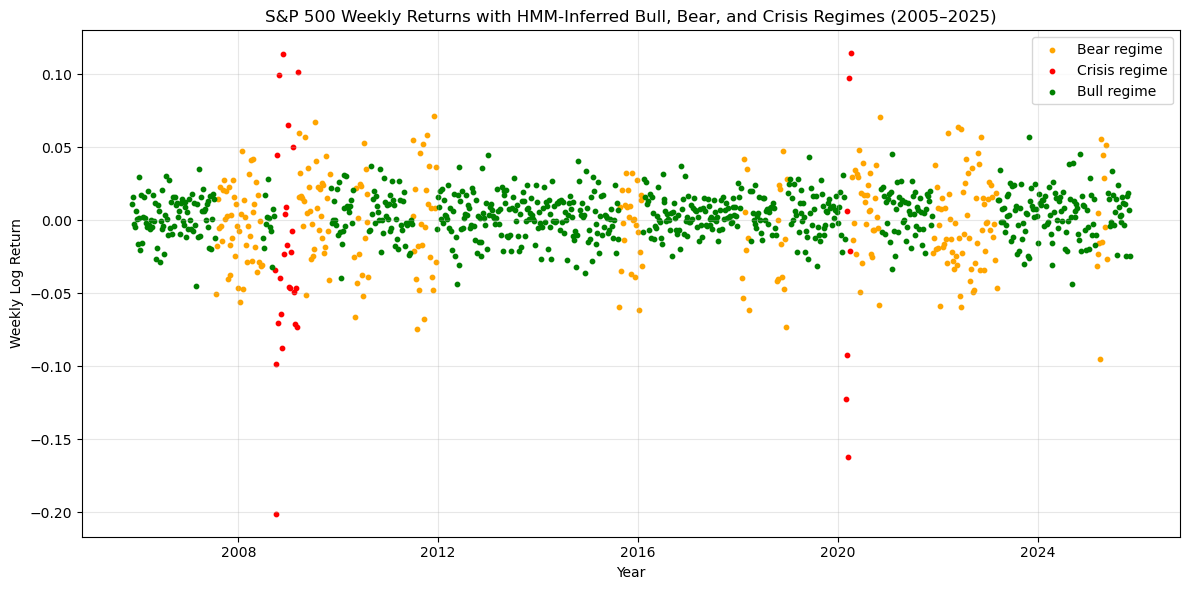

In [27]:
# === Robust 3-State HMM estimation and visualization (50 seeds, yearly x-axis) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
import warnings

# === Settings ===
FILE_PATH = r"C:\Users\roosd\Downloads\econometrie jaar 3\Thesis\sp500_weekly.csv"
N_STATES = 3
SEEDS = range(50)
N_ITER = 1000

warnings.filterwarnings("ignore", category=RuntimeWarning)

# === Helper: load weekly log returns ===
def load_returns(path):
    df = pd.read_csv(path)
    # Try to detect date column automatically
    date_col = [c for c in df.columns if "date" in c.lower()][0]
    df[date_col] = pd.to_datetime(df[date_col])
    df.sort_values(by=date_col, inplace=True)

    if "LogReturn" not in df.columns:
        price_col = "Close" if "Close" in df.columns else "Adj Close"
        df[price_col] = pd.to_numeric(df[price_col], errors="coerce")
        df["LogReturn"] = np.log(df[price_col] / df[price_col].shift(1))
    df.dropna(inplace=True)
    df["LogReturn"] = pd.to_numeric(df["LogReturn"], errors="coerce")
    return df.rename(columns={date_col: "Date"})

# === Load and prepare data ===
df = load_returns(FILE_PATH)
returns = df["LogReturn"].values.reshape(-1, 1)

# === Containers for parameter results ===
means_all, vol_all, trans_all, logL_all, valid_seeds = [], [], [], [], []

# === Fit HMM across 50 seeds ===
for seed in SEEDS:
    try:
        hmm = GaussianHMM(
            n_components=N_STATES,
            covariance_type="full",
            n_iter=N_ITER,
            random_state=seed
        ).fit(returns)

        means = hmm.means_.flatten()
        vols = np.sqrt(hmm.covars_.flatten())

        if np.any(np.isnan(means)) or np.any(np.isnan(vols)) or np.any(vols <= 0):
            continue

        order = np.argsort(vols)
        means, vols = means[order], vols[order]
        trans = hmm.transmat_[order][:, order]

        if np.any(np.isnan(trans)) or np.any(np.sum(trans, axis=1) == 0):
            continue

        means_all.append(means)
        vol_all.append(vols)
        trans_all.append(trans)
        logL_all.append(hmm.score(returns))
        valid_seeds.append(seed)

    except ValueError:
        continue

# === Compute averages across successful seeds ===
if len(valid_seeds) == 0:
    raise RuntimeError("No successful HMM fits.")
else:
    mean_means = np.mean(means_all, axis=0)
    mean_vols = np.mean(vol_all, axis=0)
    mean_trans = np.mean(trans_all, axis=0)

print(f"\n=== Averaged 3-State HMM Parameters (across {len(valid_seeds)} valid seeds) ===")
for i in range(N_STATES):
    print(f"State {i+1}: mean={mean_means[i]:.4f}, vol={mean_vols[i]:.4f}")

# === Identify best seed (highest log-likelihood) ===
best_seed = valid_seeds[np.argmax(logL_all)]
print(f"\nBest model (highest log-likelihood) found at seed={best_seed}")

# === Refit best model for visualization ===
best_model = GaussianHMM(
    n_components=N_STATES,
    covariance_type="full",
    n_iter=N_ITER,
    random_state=best_seed
).fit(returns)

# === NEW: Print transition matrix for the best model ===
order = np.argsort(np.sqrt(best_model.covars_.flatten()))
trans_ordered = best_model.transmat_[order][:, order]
trans_df = pd.DataFrame(
    trans_ordered,
    columns=[f"State {i+1}" for i in range(N_STATES)],
    index=[f"State {i+1}" for i in range(N_STATES)]
)
print("\n=== Transition Matrix (Best Model) ===")
print(trans_df.round(3))

# === Predict states ===
hidden_states = best_model.predict(returns)
hidden_states = np.array([order[s] for s in hidden_states])

# === Visualization ===
plt.figure(figsize=(12, 6))
colors = ['orange', 'red', 'green']
labels = ['Bear regime', 'Crisis regime', 'Bull regime']

for i, color in enumerate(colors):
    mask = hidden_states == i
    plt.scatter(df["Date"][mask], df["LogReturn"][mask],
                color=color, s=10, label=labels[i])

plt.title("S&P 500 Weekly Returns with HMM-Inferred Bull, Bear, and Crisis Regimes (2005–2025)")
plt.xlabel("Year")
plt.ylabel("Weekly Log Return")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

